# Perceptron


In [1]:
#Always include important imports at the top
import numpy as np #for linear algebra functions
import pandas as pd #for data processing the CSV
import random

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

#sklearn imports
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report #for nice result formatting

#importing the dataset as a dataframe
df = pd.read_csv("taxis.csv").dropna()

In [2]:
df.iloc[0]

pickup             2019-03-23 20:21:09
dropoff            2019-03-23 20:27:24
passengers                           1
distance                           1.6
fare                               7.0
tip                               2.15
tolls                              0.0
total                            12.95
color                           yellow
payment                    credit card
pickup_zone            Lenox Hill West
dropoff_zone       UN/Turtle Bay South
pickup_borough               Manhattan
dropoff_borough              Manhattan
Name: 0, dtype: object

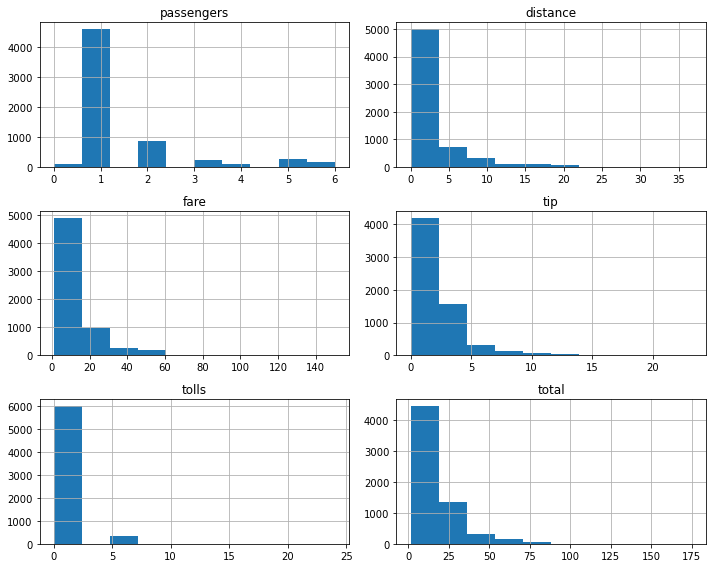

In [3]:
# View the distributions using histograms to get a sense of the spread of the various features.

df.hist(figsize = (10,8))
plt.tight_layout()
plt.show()

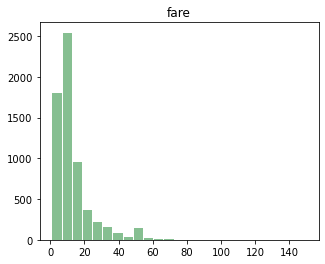

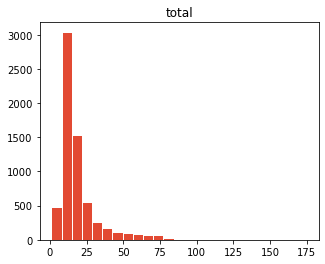

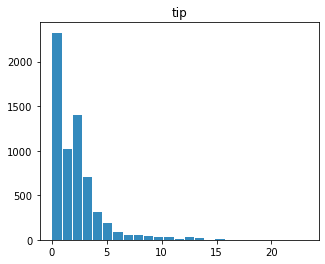

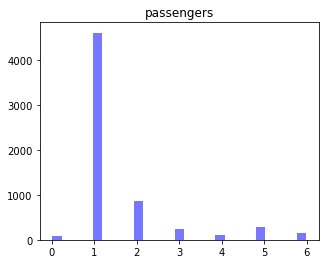

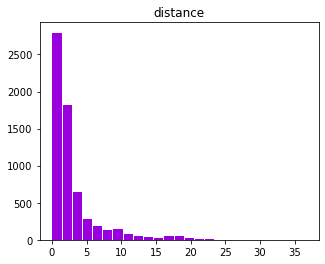

In [4]:
ax = df.hist(column='fare', bins=25, grid=False, figsize=(5,4), color='#86bf91', zorder=2, rwidth=0.9)
bx = df.hist(column='total', bins=25, grid=False, figsize=(5,4), color="#e24a33", zorder=2, rwidth=0.9)
cx = df.hist(column='tip', bins=25, grid=False, figsize=(5,4), color="#348abd", zorder=2, rwidth=0.9)
dx = df.hist(column='passengers', bins=25, grid=False, figsize=(5,4), color="#77f", zorder=2, rwidth=0.9)
ex = df.hist(column='distance', bins=25, grid=False, figsize=(5,4), color="#90d", zorder=2, rwidth=0.9)

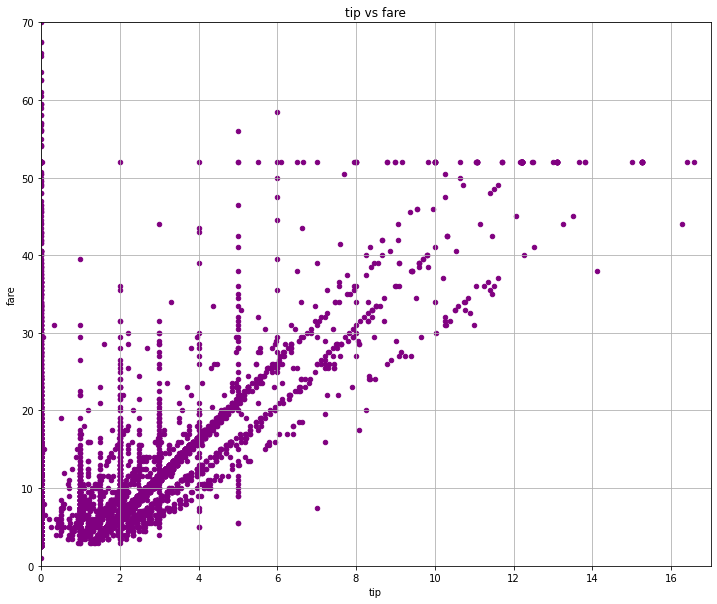

In [15]:
df.plot(kind='scatter',x= 'tip',y='fare',color='purple',figsize = (12,10), grid = True)
plt.gca().set(xlim=(0, 17), ylim=(0, 70) )
plt.xlabel('tip')
plt.ylabel('fare')
plt.title('tip vs fare')
plt.show()

## Building the Perceptron

In [19]:
class Perceptron():
    # initialize
    def __init__(self) -> None:
        self.X = None
        self.variables = None
        self.y = None
        self.predictor = None
        self.n = None
        self.p = None
        self.bias = None
        self.gamma = None
        self.max_iter = None
        self.eta = None

        self.weights = None
        self.weights_history = []
        self.loss_history = [np.inf]

    def sign(self, x, y):
        if x@y>0:
            return 1
        else:
            return -1
        
    def loss(self):
        return sum(0.5*(self.sign(self.weights, x) - self.y[i])**2 for i, x in enumerate(self.X))

    def grad_approx(self, x, y):
        return (self.sign(self.weights, x) - y) * x

    def update_w(self, id):
        self.weights = self.weights - self.gamma * self.grad_approx(self.X[id], self.y[id])
        self.weights_history.append(self.weights)
        return 

        # model fitting
    def fit(self, X, y, bias=True, gamma=0.01, max_iter=100, eta=0.001):
        self.variables = X.columns
        self.predictor = y.name
        
        X = X.to_numpy()
        y = y.to_numpy()
        if bias:
            ones_column = np.ones((X.shape[0], 1))
            X = np.append(ones_column, X, axis=1)
        self.X = X
        self.y = y
        self.n = X.shape[0]
        self.p = X.shape[1]
        self.bias = bias
        self.gamma = gamma
        self.max_iter = max_iter
        self.eta = eta
        
        weights = np.random.rand(self.p)
        self.weights = weights
        self.weights_history.append(weights)

        for i in range(1, max_iter+1):
            random_id = np.random.randint(self.n)
            weights = self.update_w(random_id)
            L = self.loss()
            self.loss_history.append(L)
            if i >= self.max_iter:
                break
                
    # predict new data
    def prediction(self, X, weights):
        X = X.to_numpy()
        if self.bias:
            ones_column = np.ones((X.shape[0], 1))
            X = np.append(ones_column, X, axis=1)
        y_hat = [self.sign(x, weights) for x in X]
        return y_hat

## Pre-Processing
Before we can create a perceptron with this dataset, we need to pre-process the data and encode labels. We will do this using sklearn's preprocessing package.

In [20]:
 #Replacing Credit card/Cash in the target variable (Payment) with 1/0
df['payment'] = df['payment'].map({'credit card':0, 'cash':1})

In [21]:
#Create a function which takes the dataset as input and ouputs the processed dataset
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    res_df['pickup'] = le.fit_transform(res_df['pickup'])
    res_df['dropoff'] = le.fit_transform(res_df['dropoff'])
    res_df['passengers'] = le.fit_transform(res_df['passengers'])
    res_df['distance'] = le.fit_transform(res_df['distance'])
    res_df['fare'] = le.fit_transform(res_df['fare'])
    res_df['tip'] = le.fit_transform(res_df['tip'])
    res_df['color'] = le.fit_transform(res_df['color'])
    res_df['tolls'] = le.fit_transform(res_df['tolls'])
    res_df['total'] = le.fit_transform(res_df['total'])
    return res_df

#Run the function on the desired dataset
encoded_df = preprocessor(df)

The next step is to select which features we want to use with logistic regression and standardize them.

In [22]:
#Selecting features
X = encoded_df.drop(['payment','pickup_zone','dropoff_zone','pickup_borough','dropoff_borough'],axis =1)
y = encoded_df['payment']
y

0       0
1       1
2       0
3       0
4       0
       ..
6428    0
6429    0
6430    1
6431    0
6432    0
Name: payment, Length: 6342, dtype: int64

In [23]:
X.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color
0,4780,4786,1,153,10,116,0,153,1
1,688,686,1,72,6,0,0,65,1
2,5444,5449,1,130,11,130,0,183,1
3,1905,1905,1,655,86,307,0,579,1
4,6024,6034,3,209,14,45,0,163,1


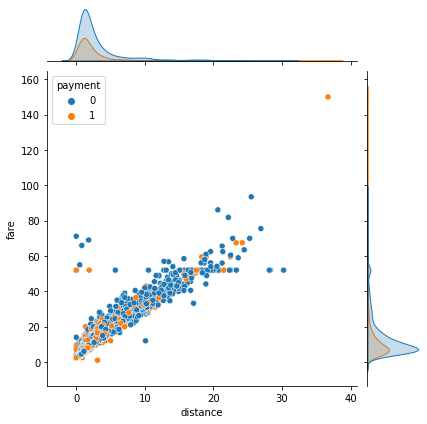

In [24]:
sns.jointplot(x='distance', y='fare', data= df, hue= 'payment')

In [25]:
#Standardizing features
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X))

#Confirm the new mean and standard deviation of the dataset
mean = np.mean(X, axis=0)
print('Mean: (%d, %d)' % (mean[0], mean[1]))
standard_deviation = np.std(X, axis=0)
print('Standard deviation: (%d, %d)' % (standard_deviation[0], standard_deviation[1]))

Mean: (0, 0)
Standard deviation: (1, 0)


Text(0, 0.5, 'cash')

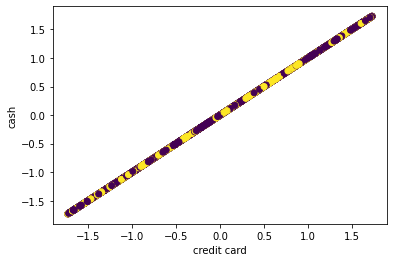

In [26]:
plt.scatter(X.iloc[:, 0], X.iloc[:,1],c=y)
plt.xlabel('credit card')
plt.ylabel('cash')

In [27]:
#Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 40)

In [28]:
#Instantiate the model
model = Perceptron()
#Fit the model with data
model.fit(X_train, y_train, gamma=0.001, max_iter=1000)

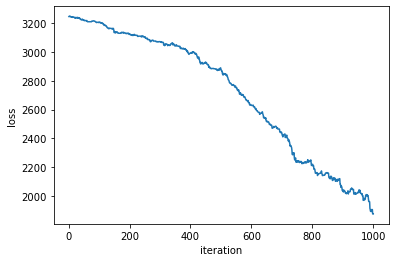

In [29]:
#Loss history during training
plt.plot(model.loss_history)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

# Performance Analysis
The next step is to conduct a performance analysis of the perceptron. We do this by examining the confusion matrix and the Receiver Operating Characteristic (ROC) curve.

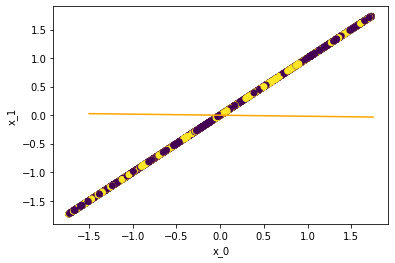

In [30]:
plt.scatter(X.iloc[:, 0], X.iloc[:,1], c=y)

domain = np.arange(-1.5, 2, 0.25)
w = model.weights
line = [-(w[1:2]*x)/w[0] for x in domain]

plt.plot(domain, line, label='separator', color = 'orange')
plt.xlabel('x_0')
plt.ylabel('x_1')
plt.show()

In [31]:
y_pred = model.prediction(X_train, model.weights)
print(f'Training accuracy score = {accuracy_score(y_train, y_pred)}')

y_pred_test = model.prediction(X_test, model.weights)
print(f'Test accuracy score = {accuracy_score(y_test, y_pred_test)}')

Training accuracy score = 0.2649285113540791
Test accuracy score = 0.26544766708701134


Text(0.5, 257.44, 'Predicted label')

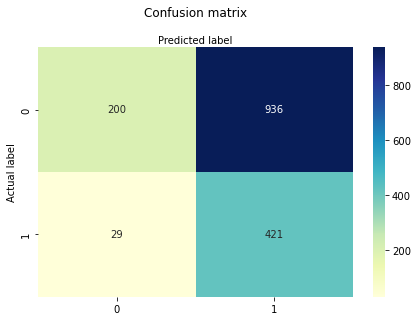

In [32]:
#Creating the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_test)
class_names=[0,1] # name of classes

#The confusion matrix was coming out with a "T" in the middle of the data, so the lines below fix the formatting
cnf_matrix = np.delete(cnf_matrix, 0, 0) #delete first row of confusion matrix
cnf_matrix = np.delete(cnf_matrix, 1, 1) #delete middle column of confusion matrix

#Creating the figure
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#Adding the heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [33]:
#Print a nicely formatted report
classify_perceptron = classification_report(y_test, y_pred_test)
print("\nClassification Report")
print(classify_perceptron)


Classification Report
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00      1136
           1       0.31      0.94      0.47       450

    accuracy                           0.27      1586
   macro avg       0.10      0.31      0.16      1586
weighted avg       0.09      0.27      0.13      1586



C:\Users\durga\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\durga\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\durga\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\durga\anaconda3\lib\site-packages\sklearn\metrics\_cla

The Perceptron Learning Algorithm is only accurate when the data is linearly separable.  It is not a good fit for this data set

# Conclusion and Comparison on Accuracy: 

Perceptron
Training accuracy score = 0.2649285113540791

Test accuracy score = 0.26544766708701134
